## RFM模型介绍

#### 根据美国数据库营销研究所Arthur Hughes的研究，客户数据库中有三个神奇的要素，这三个要素构成了数据分析最好的指标：
#### ·最近一次消费间隔(Recency) ：                         最近一次消费间隔(Recency)，上一次消费越近，用户价值越高
#### ·消费频率(Frequency) ：                                    消费频率(Frequency)越高，用户价值越高
#### ·消费金额(Monetary) ：                                      消费金额(Monetary)越高，用户价值越高


### 三个指标作为XYZ轴，可以把空间分成8部分，意味着八类的用户

<img src="./RFM模型.jpg" style="zoom:30%" />

<img src="./用户分类规则.jpg" style="zoom:60%" />

#### 重要价值客户：最近消费时间近、消费频次和消费金额都很高，VIP服务。
#### 重要发展客户：最近消费时间较近、消费金额高，但频次不高，忠诚度不高，很有潜力的用户，必须重点发展。
#### 重要保持客户：最近消费时间较远，但消费频次和金额都很高，说明这是个一段时间没来的忠诚客户，我们需要主动和他保持联系。
#### 重要挽留客户：最近消费时间较远、消费频次不高，但消费金额高的用户，可能是将要流失或者已经要流失的用户，应当给予挽留措施。

## 导入相关库

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 导入数据集

In [2]:
air  = pd.read_csv(r"C:\Users\cynic\OneDrive\Desktop\air_data.csv", index_col = 0)

## 数据探查

In [3]:
air.shape

(62988, 44)

In [4]:
air.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [5]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62988 entries, 0 to 62987
Data columns (total 44 columns):
MEMBER_NO                  62988 non-null int64
FFP_DATE                   62988 non-null object
FIRST_FLIGHT_DATE          62988 non-null object
GENDER                     62985 non-null object
FFP_TIER                   62988 non-null int64
WORK_CITY                  60719 non-null object
WORK_PROVINCE              59740 non-null object
WORK_COUNTRY               62962 non-null object
AGE                        62568 non-null float64
LOAD_TIME                  62988 non-null object
FLIGHT_COUNT               62988 non-null int64
BP_SUM                     62988 non-null int64
EP_SUM_YR_1                62988 non-null int64
EP_SUM_YR_2                62988 non-null int64
SUM_YR_1                   62437 non-null float64
SUM_YR_2                   62850 non-null float64
SEG_KM_SUM                 62988 non-null int64
WEIGHTED_SEG_KM            62988 non-null float64
LAST_FLIGHT_

<img src="./航空信息属性表.png" style="zoom:150%" />

## 模型思路拓展:
#### L: 会员入会时间距离观测窗口结束的月数
#### R: 客户最近一次乘坐公司飞机距离观测窗口结束的月数
#### F: 客户在观察窗口中乘坐公司飞机的次数
#### M: 客户在观测窗口内累计的飞行里程数
#### C: 客户在观测窗口内乘坐舱位所对应的折扣系数的平均数

In [6]:
air.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988,NaN,NaN,NaN,31494.5,18183.2,1,15747.8,31494.5,47241.2,62988
FFP_DATE,62988,3068,2011/01/13,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FIRST_FLIGHT_DATE,62988,3406,2013/02/16,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENDER,62985,2,男,48134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FFP_TIER,62988,NaN,NaN,NaN,4.10216,0.373856,4,4,4,4,6
WORK_CITY,60719,3310,广州,9385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WORK_PROVINCE,59740,1185,广东,17507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WORK_COUNTRY,62962,118,CN,57748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,62568,NaN,NaN,NaN,42.4763,9.88591,6,35,41,48,110
LOAD_TIME,62988,1,2014/03/31,62988,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
describe = air.describe(include = 'all').T

In [8]:
air.isna().sum()

MEMBER_NO                     0
FFP_DATE                      0
FIRST_FLIGHT_DATE             0
GENDER                        3
FFP_TIER                      0
WORK_CITY                  2269
WORK_PROVINCE              3248
WORK_COUNTRY                 26
AGE                         420
LOAD_TIME                     0
FLIGHT_COUNT                  0
BP_SUM                        0
EP_SUM_YR_1                   0
EP_SUM_YR_2                   0
SUM_YR_1                    551
SUM_YR_2                    138
SEG_KM_SUM                    0
WEIGHTED_SEG_KM               0
LAST_FLIGHT_DATE              0
AVG_FLIGHT_COUNT              0
AVG_BP_SUM                    0
BEGIN_TO_FIRST                0
LAST_TO_END                   0
AVG_INTERVAL                  0
MAX_INTERVAL                  0
ADD_POINTS_SUM_YR_1           0
ADD_POINTS_SUM_YR_2           0
EXCHANGE_COUNT                0
avg_discount                  0
P1Y_Flight_Count              0
L1Y_Flight_Count              0
P1Y_BP_S

In [9]:
describe['null'] = air.isna().sum()

In [10]:
describe = describe[['null','max','min']].sort_values(by = 'null', ascending = False)

In [11]:
describe.columns =[u'缺失值',u'最大值',u'最小值']

In [12]:
describe

,缺失值,最大值,最小值
WORK_PROVINCE,3248,NaN,NaN
WORK_CITY,2269,NaN,NaN
SUM_YR_1,551,239560,0
AGE,420,110,6
SUM_YR_2,138,234188,0
WORK_COUNTRY,26,NaN,NaN
GENDER,3,NaN,NaN
MEMBER_NO,0,62988,1
Eli_Add_Point_Sum,0,984938,0
avg_discount,0,1.5,0


In [13]:
#只保留窗口期第一年和窗口期第二年票价均不为空的会员记录

air = air[(air['SUM_YR_1'].notnull()) & (air['SUM_YR_2'].notnull())] 

In [14]:
#增加更多筛选条件

filter1 = ((air['AGE'] >= 18) & (air['GENDER'].notnull())) #年龄不小于18岁，性别不为空
filter2 = ((air['SUM_YR_1'] != 0) & (air['SUM_YR_2'] != 0)) #两年窗口期票价不为0
filter3 = air['SEG_KM_SUM'] != 0 #观测窗口的总飞行公里数不为0
filter4 = air['avg_discount'] > 0 #平均折扣率不为0
filter5 = ((air['Points_Sum'] == 0) & (air['EXCHANGE_COUNT'] == 0)) #总累计积分为0且积分兑换次数为0
filter6 = air['LAST_FLIGHT_DATE'] != '2014/2/29  0:00:00' #末次飞行日期异常

air = air[filter1 & filter2 & filter3 & filter4 &  -filter5 & filter6] #'\'表示或者，五个条件中满足一个便舍弃

In [15]:
air.shape

(40879, 44)

In [16]:
#只选取模型所需的特征

FeatureSelected = ['FFP_DATE','LOAD_TIME','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']
air = air[FeatureSelected]

In [17]:
#把相关特征转化为日期型

air['FFP_DATE'] = pd.to_datetime(air['FFP_DATE'])
air['LOAD_TIME'] = pd.to_datetime(air['LOAD_TIME'])

In [18]:
#两者做差生成新变量：入会距离观察结束点时长

air['SINCE_JOIN'] = (air['LOAD_TIME'] - air['FFP_DATE'])/np.timedelta64(1,'M') #初始做差为天数，将其转化为月

In [19]:
#选取最后进入模型的特征

FinalFeature = ['SINCE_JOIN','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']
air = air[FinalFeature]
air.columns = [u'入会时长',u'最近乘机',u'飞行次数',u'飞行公里',u'平均折扣']

In [20]:
#个特征数据量级不同，需采取z-score标准化

air = (air - air.mean())/(air.std())
air.describe().T

,count,mean,std,min,25%,50%,75%,max
入会时长,40879.0,-1.379451e-14,1.0,-1.367817,-0.889681,-0.219125,0.817614,2.214704
最近乘机,40879.0,4.546439e-15,1.0,-1.027376,-0.843630,-0.323017,0.585505,2.698583
飞行次数,40879.0,1.433686e-14,1.0,-0.871587,-0.617692,-0.300323,0.270941,12.521374
飞行公里,40879.0,-1.364043e-15,1.0,-0.937743,-0.615419,-0.311583,0.246018,23.615750
平均折扣,40879.0,3.050449e-15,1.0,-3.402882,-0.588264,-0.084753,0.428831,4.406521


## 建模

In [21]:
model = KMeans(n_clusters = 5) #实例化
model.fit(air)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
model.cluster_centers_

array([[-3.49903412e-01,  1.52124112e+00, -5.81957181e-01,
        -5.42670325e-01, -1.77042488e-01],
       [-7.05863088e-01, -4.59405423e-01, -1.76284075e-01,
        -1.77083502e-01, -2.04093831e-01],
       [ 4.78475149e-01, -8.16016756e-01,  2.33017563e+00,
         2.25273468e+00,  2.47721213e-01],
       [ 2.17172257e-01, -1.08657975e-01, -1.35518126e-02,
        -8.03456157e-04,  2.98605220e+00],
       [ 1.13619088e+00, -3.15674664e-01, -8.46818235e-02,
        -9.12506997e-02, -1.32100272e-01]])

In [23]:
model.labels_ 

array([2, 2, 2, ..., 0, 1, 1])

## 分析

In [24]:
result = pd.DataFrame(model.cluster_centers_, columns = air.columns)

In [25]:
result

,入会时长,最近乘机,飞行次数,飞行公里,平均折扣
0,-0.349903,1.521241,-0.581957,-0.542670,-0.177042
1,-0.705863,-0.459405,-0.176284,-0.177084,-0.204094
2,0.478475,-0.816017,2.330176,2.252735,0.247721
3,0.217172,-0.108658,-0.013552,-0.000803,2.986052
4,1.136191,-0.315675,-0.084682,-0.091251,-0.132100


In [26]:
result['聚类数量'] = pd.DataFrame(pd.Series(model.labels_).value_counts())

In [27]:
result

,入会时长,最近乘机,飞行次数,飞行公里,平均折扣,聚类数量
0,-0.349903,1.521241,-0.581957,-0.542670,-0.177042,9103
1,-0.705863,-0.459405,-0.176284,-0.177084,-0.204094,15622
2,0.478475,-0.816017,2.330176,2.252735,0.247721,3848
3,0.217172,-0.108658,-0.013552,-0.000803,2.986052,1755
4,1.136191,-0.315675,-0.084682,-0.091251,-0.132100,10551


In [28]:
for n_clusters in [2,3,4,5,6,7]:
    clusterer = KMeans(n_clusters, random_state=10).fit(air)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(air, cluster_labels)
    print("当簇的个数 =", n_clusters,
          "时，平均的轮廓系数为:", silhouette_avg)

当簇的个数 = 2 时，平均的轮廓系数为: 0.3464659594716607
当簇的个数 = 3 时，平均的轮廓系数为: 0.2457799639507741
当簇的个数 = 4 时，平均的轮廓系数为: 0.2549963217043655
当簇的个数 = 5 时，平均的轮廓系数为: 0.27058499765110605
当簇的个数 = 6 时，平均的轮廓系数为: 0.2672743274604179
当簇的个数 = 7 时，平均的轮廓系数为: 0.25293689963466587


当簇的个数 = 2 时，平均的轮廓系数为: 0.3464659594716607


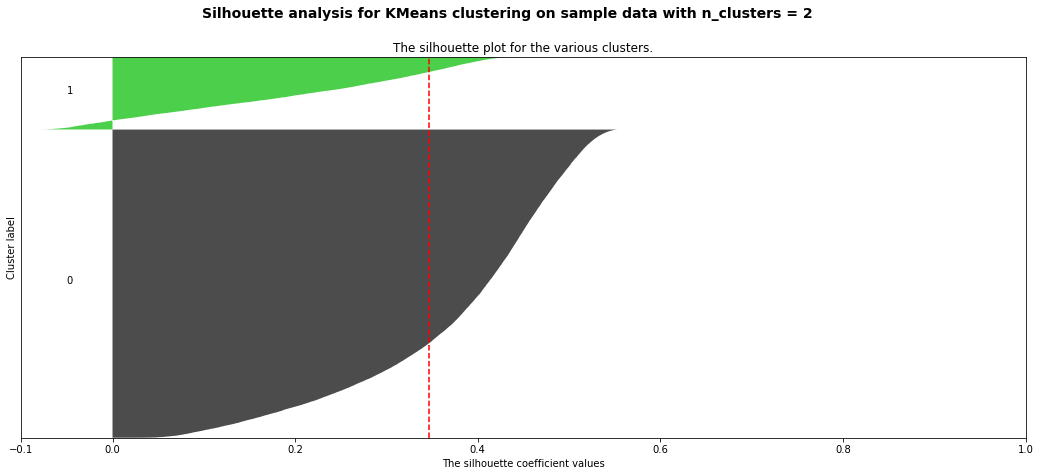

当簇的个数 = 3 时，平均的轮廓系数为: 0.2457799639507741


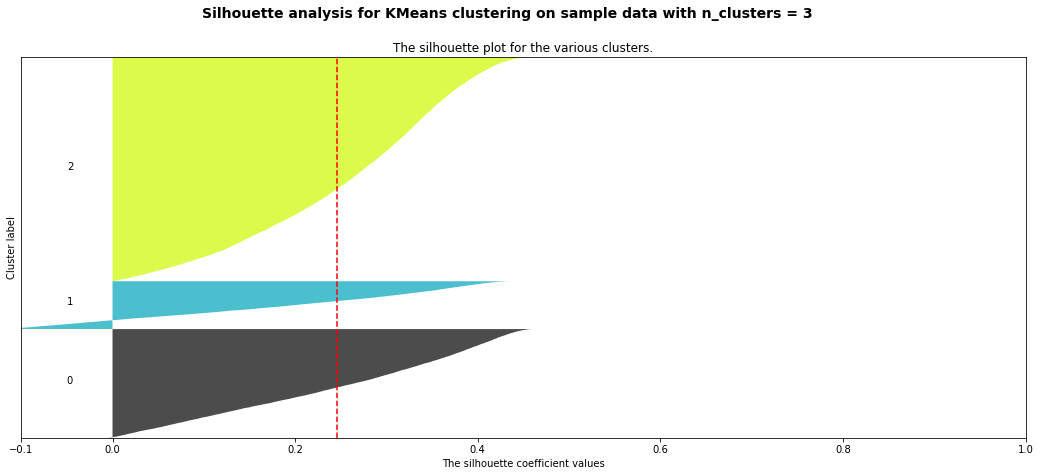

当簇的个数 = 4 时，平均的轮廓系数为: 0.2549963217043655


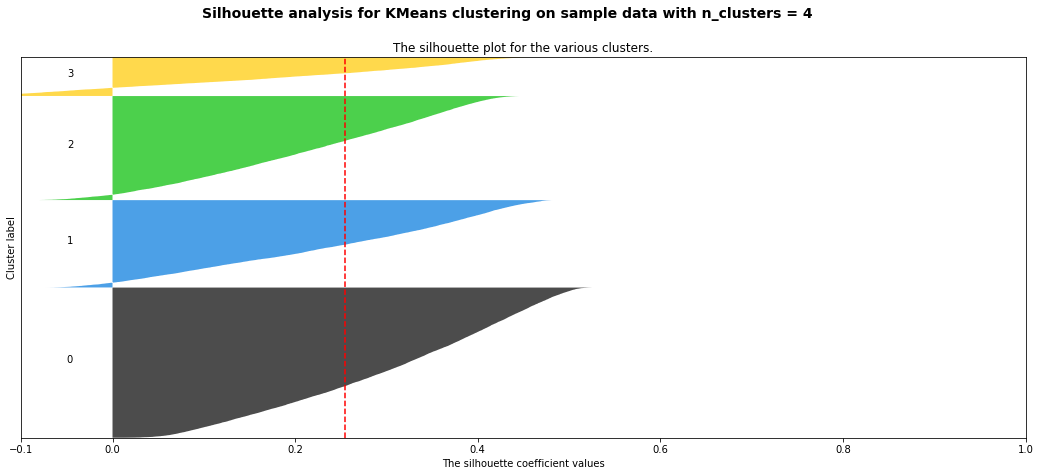

当簇的个数 = 5 时，平均的轮廓系数为: 0.27058499765110605


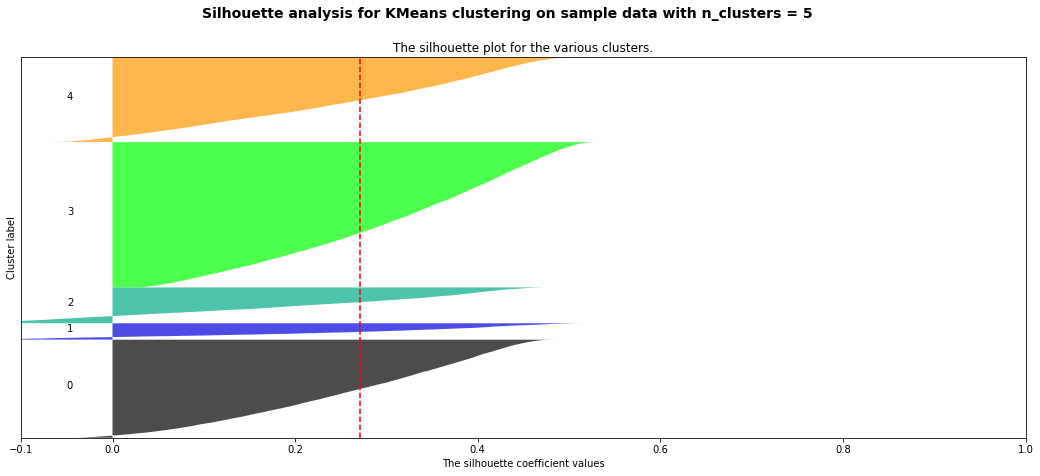

当簇的个数 = 6 时，平均的轮廓系数为: 0.2672743274604179


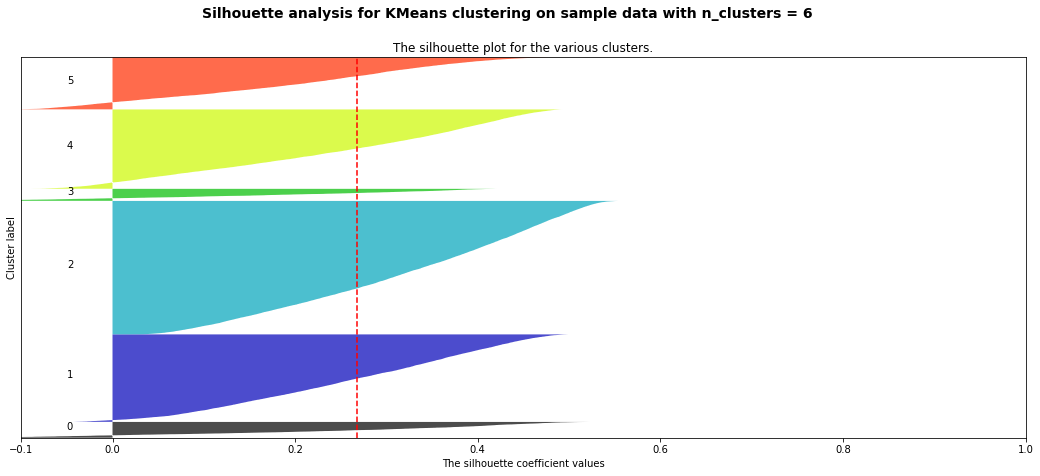

当簇的个数 = 7 时，平均的轮廓系数为: 0.25293689963466587


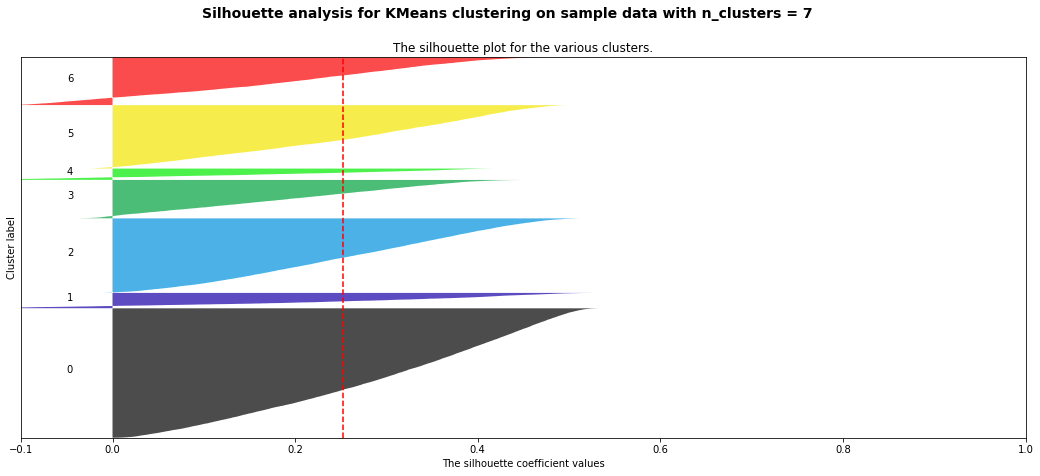

In [29]:
for n_clusters in [2,3,4,5,6,7]:
    n_clusters = n_clusters
    fig, ax1 = plt.subplots()
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, air.shape[0] + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(air)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(air, cluster_labels)
    print("当簇的个数 =", n_clusters,
          "时，平均的轮廓系数为:", silhouette_avg)
    sample_silhouette_values = silhouette_samples(air, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                          ,ith_cluster_silhouette_values
                          ,facecolor=color
                          ,alpha=0.7
                         )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [30]:
#绘制雷达图

rslt_forplot = result.iloc[:, result.columns !='聚类数量']

In [31]:
rslt_forplot 

,入会时长,最近乘机,飞行次数,飞行公里,平均折扣
0,-0.349903,1.521241,-0.581957,-0.542670,-0.177042
1,-0.705863,-0.459405,-0.176284,-0.177084,-0.204094
2,0.478475,-0.816017,2.330176,2.252735,0.247721
3,0.217172,-0.108658,-0.013552,-0.000803,2.986052
4,1.136191,-0.315675,-0.084682,-0.091251,-0.132100


In [32]:
labels = list(rslt_forplot.columns)

In [33]:
N = len(labels)

In [34]:
rslt_forplot.iloc[1]

入会时长   -0.705863
最近乘机   -0.459405
飞行次数   -0.176284
飞行公里   -0.177084
平均折扣   -0.204094
Name: 1, dtype: float64

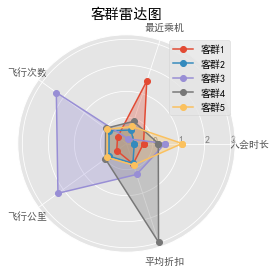

In [35]:
matplotlib.rcParams['font.family'] = ['simhei']
plt.rcParams['axes.unicode_minus'] = False 

plt.style.use('ggplot') #采用ggplot的绘图风格

ax = plt.subplot(111, polar=True)

angles = [n / float(N)*2*np.pi for n in range(N)]
angles += angles[:1]

for i in range(len(rslt_forplot)):
    values = rslt_forplot.iloc[i].tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', label = '客群'+str(i+1))
    ax.fill(angles, values, alpha = .3)

plt.xticks(angles[:-1], labels)
ax.set_rlabel_position(0)
plt.yticks([-1,0,1,2,3], color = 'grey')
plt.title('客群雷达图')
plt.legend(loc = 'best')

plt.show()

In [36]:
#导出成excel相关格式文件在excel中绘图

result.to_excel('聚类结果.xlsx', sheet_name = 'result',encoding = 'utf-8' )

#### 客群4——重要发展客户：平均折扣率（C）高，最近乘坐航班（R）低，飞行次数（F）和飞行公里（M）低，且入会时间（L）短。潜在的价值客户，目前的价值不是最高，有很大的发展空间，要促使这类客户增加在本公司的乘机消费。通过对这类客户的满意度加强来提高他们转向竞争对手的转移成本，使他们成为忠实的客户。
#### 客群3——重要保持客户：平均折扣率（C）高，最近乘坐航班（R）低，飞行次数（F）和飞行公里（M）较高。公司的高价值客户，最理想的客户类型，对公司贡献最大，所占比例不高。优先投放资源，差异化管理和一对一营销提高他们的满意度和忠诚度，尽可能延长他们的高水平消费。
#### 客群5——重要挽留客户：过去的平均折扣率（C），飞行次数（F）和飞行公里（M）较高，但较长时间没有乘坐公司的航班（R）。他们客户价值变化的不确定性很高，但这类客户的衰退原因各有不同，需要掌握他们的最新消息、维持和客户的互动。可以根据这些客户的最近消费时间、消费次数的变化情况，推测他们的异动状况并列出名单，对其重点联系，最好可以采用一定的营销手段，延长客户在我司的生命周期。
#### 客群1和2——一般和低价值客户：平均折扣率（C）很低，较长时间没有乘坐航班（R），飞行次数（F）和飞行公里（M）较较低，入会时间（L）短。大概率只有在公司机票打折促销的情况下，才会乘坐航班。